In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

Image Segmentation test using openCV

In [1]:
def histogram_equalization(img_bgr):
    img_ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    img_ycrcb[:, :, 0] = cv2.equalizeHist(img_ycrcb[:, :, 0])
    img_bgr = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)
    return img_bgr

In [13]:
def segment_otsu(image_grayscale, img_BGR):
    threshold_value, threshold_image = cv2.threshold(image_grayscale, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    threshold_image_binary = 1 - (threshold_image / 255)
    threshold_image_binary = np.repeat(threshold_image_binary[:, :, np.newaxis], 3, axis=2)
    img_face_only = np.multiply(threshold_image_binary, img_BGR).astype('uint8')
    return img_face_only

In [70]:
img_bgr = cv2.imread('../img/FairFace_Combined/58.jpg')

Original Image


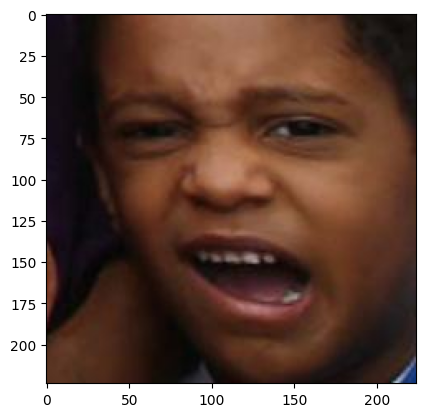

In [71]:
print("Original Image")
plt.imshow(img_bgr[:, :, ::-1])
plt.show()

In [72]:
# print("Image after classification")
img_bgr = histogram_equalization(img_bgr)
img_grayscale = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_bgr = segment_otsu(img_grayscale, img_bgr)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)

# plt.imshow(img_bgr[:, :, ::-1])
# plt.show()

After masking


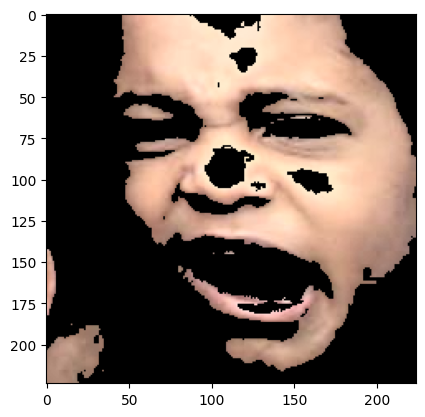

In [73]:
mask = (img_hsv[:, :, 0] <= 170) & \
    (img_ycrcb[:, :, 1] >= 140) & \
    (img_ycrcb[:, :, 1] <= 170) & \
    (img_ycrcb[:, :, 2] >= 90) & \
    (img_ycrcb[:, :, 2] <= 120)

print("After masking")
img_bgr[~mask] = 0
plt.imshow(img_bgr[:, :, ::-1])
plt.show()

Final average skin tone RGB: 218.72580019816482, 176.73855167363115, 153.6574333347693


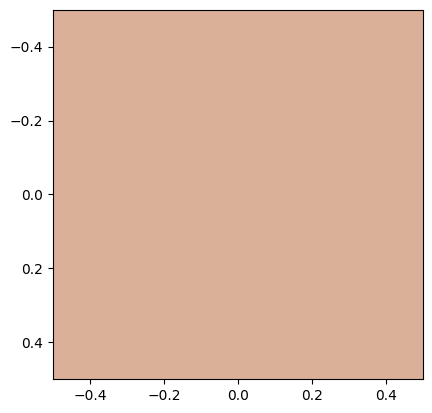

In [74]:
blue = np.ma.array(img_bgr[:, :, 0], mask=~mask).mean()
green = np.ma.array(img_bgr[:, :, 1], mask=~mask).mean()
red = np.ma.array(img_bgr[:, :, 2], mask=~mask).mean()

print(f"Final average skin tone RGB: {red}, {green}, {blue}")
plt.imshow([[[x / 255 for x in [red, green, blue]]]])
plt.show()